In [1]:
import keras
import keras.backend as K
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Embedding, Dropout, TimeDistributed, Flatten
from keras.layers import LSTM, GRU, RNN
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from google.colab import files
# upload polution_dataSet.npy file
uploaded = files.upload()
# import data into a dataframe
import io
data = np.load(io.BytesIO(uploaded['polution_dataSet.npy']))

Saving polution_dataSet.npy to polution_dataSet (5).npy


In [0]:
'''
IN this part data for test, validation and train is preperd.
'''
# data format is : pollution  ,dew  ,temp  , press ,wnd_dir , wnd_spd , snow , rain
# total data =43000
# per day and week = 43000/24*7 =250

SAMPLE_DISTANCE = 24*7    # if 1 sample per hour, if 24 per day, if 24*7 per week
TRAIN_SIZE = 120
VAL_SIZE = 50
TEST_SIZE = 30
TIMESTEPS = 8             # timesteps used for a single prediction (here each timestep is a week)
HOUR = 2                  # which hour of day ? (0-23) (not so important)

In [0]:
x_train = []
y_train = []
for i in range(TRAIN_SIZE):
    x_train.append(np.array(data[i*SAMPLE_DISTANCE+HOUR:i*SAMPLE_DISTANCE+TIMESTEPS+HOUR]))
    y_train.append(np.array(data[i*SAMPLE_DISTANCE+TIMESTEPS+HOUR, 0]))
x_train = np.array(x_train)
y_train = np.array(y_train)

In [0]:
x_val = []
y_val = []
for i in range(TRAIN_SIZE, TRAIN_SIZE+VAL_SIZE):
    x_val.append(np.array(data[i*SAMPLE_DISTANCE+HOUR:i*SAMPLE_DISTANCE+TIMESTEPS+HOUR]))
    y_val.append(np.array(data[i*SAMPLE_DISTANCE+TIMESTEPS+HOUR, 0]))
x_val = np.array(x_val)
y_val = np.array(y_val)

In [0]:
x_test = []
y_test = []
for i in range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE):
    x_test.append(np.array(data[i*SAMPLE_DISTANCE+HOUR:i*SAMPLE_DISTANCE+TIMESTEPS+HOUR]))
    y_test.append(np.array(data[i*SAMPLE_DISTANCE+TIMESTEPS+HOUR, 0]))
x_test = np.array(x_test)
y_test = np.array(y_test)
y_total = np.concatenate([y_train, y_val, y_test], axis=None)

In [0]:
'''
In this part network is implemented 
'''
# parameters
BATCH_SIZE = 10
NUM_EPOCHS = 20
HIDDEN_SIZE = 40

In [0]:
from keras import backend
K.clear_session()
# keras modeling
model = Sequential()
model.add(GRU(HIDDEN_SIZE,  input_shape=(TIMESTEPS, 8), return_sequences=False,activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, dropout=0.0, recurrent_dropout=0.0))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 40)                5880      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 5,921
Trainable params: 5,921
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, verbose=1, validation_data=(x_val, y_val))

Train on 120 samples, validate on 50 samples
Epoch 1/20
120/120 [==============================] - 0s 4ms/step - loss: 0.0837 - val_loss: 0.0665
Epoch 2/20
120/120 [==============================] - 0s 503us/step - loss: 0.0585 - val_loss: 0.0582
Epoch 3/20
120/120 [==============================] - 0s 481us/step - loss: 0.0406 - val_loss: 0.0488
Epoch 4/20
120/120 [==============================] - 0s 510us/step - loss: 0.0334 - val_loss: 0.0346
Epoch 5/20
120/120 [==============================] - 0s 470us/step - loss: 0.0276 - val_loss: 0.0312
Epoch 6/20
120/120 [==============================] - 0s 474us/step - loss: 0.0222 - val_loss: 0.0340
Epoch 7/20
120/120 [==============================] - 0s 467us/step - loss: 0.0204 - val_loss: 0.0248
Epoch 8/20
120/120 [==============================] - 0s 465us/step - loss: 0.0208 - val_loss: 0.0207
Epoch 9/20
120/120 [==============================] - 0s 469us/step - loss: 0.0215 - val_loss: 0.0199
Epoch 10/20
120/120 [==================

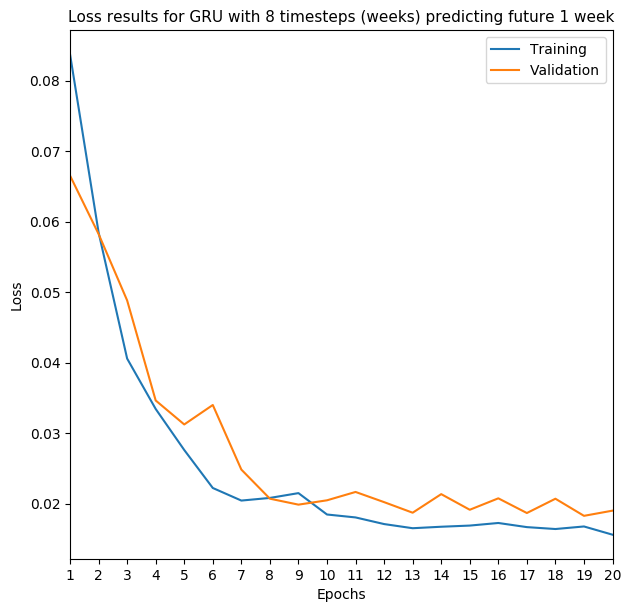

In [11]:
plt.figure(1, figsize=(7, 7), dpi=100)
plt.style.use(['default'])
plt.plot(np.arange(1,NUM_EPOCHS+1,1), history.history['loss'], label='Training')
plt.plot(np.arange(1,NUM_EPOCHS+1,1), history.history['val_loss'], label='Validation')
plt.xticks(np.arange(1, NUM_EPOCHS+1, 1, dtype=int))
plt.xlim(1, NUM_EPOCHS)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss results for GRU with 8 timesteps (weeks) predicting future 1 week', fontsize=11)
plt.legend()
plt.show()

In [12]:
print('train loss history:', history.history["loss"])
print('test loss history:', history.history["val_loss"])
scores = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE, verbose=1)
print('\nTest result loss: %.3f' % (scores))

train loss history: [0.08372321135054032, 0.058471559236447014, 0.040575893906255565, 0.03343179744357864, 0.02761424146592617, 0.022227573907002807, 0.020442963112145662, 0.020817788628240425, 0.02149886591359973, 0.018466997464808326, 0.018051777423049014, 0.017111634952016175, 0.016522788675501943, 0.016732303037618596, 0.016896828698615234, 0.017264487221837044, 0.016678620595484972, 0.016408456799884636, 0.016771307137484353, 0.01560371951200068]
test loss history: [0.06651878878474235, 0.058240844309329985, 0.0488196961581707, 0.03463379964232445, 0.031234252825379373, 0.03399395495653153, 0.024837648123502733, 0.020709621906280517, 0.019864861294627188, 0.020480237156152725, 0.021665027551352977, 0.02022065855562687, 0.01872036810964346, 0.02135477978736162, 0.01913912110030651, 0.020760336332023142, 0.018677196651697158, 0.0207041522487998, 0.018278115056455137, 0.019013681821525096]
30/30 [==============================] - 0s 178us/step

Test result loss: 0.015


In [0]:
y_train = model.predict(x_train, batch_size=BATCH_SIZE)
y_val = model.predict(x_val, batch_size=BATCH_SIZE)
y_pred = model.predict(x_test, batch_size=BATCH_SIZE)

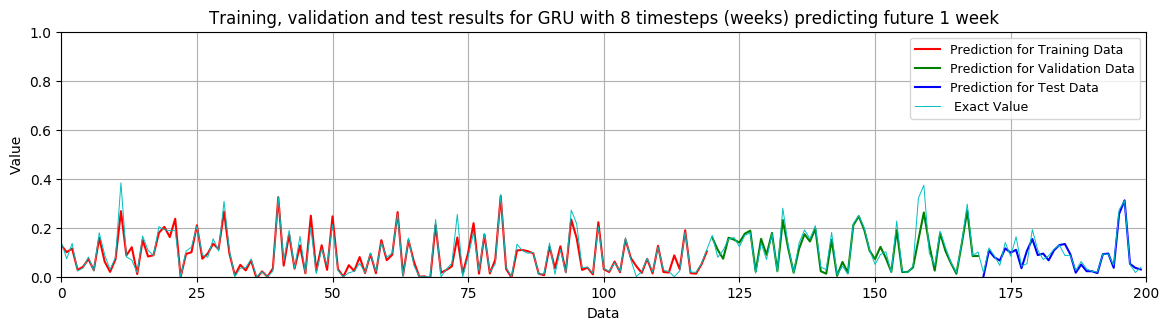

In [14]:
plt.figure(2, figsize=(14, 7), dpi=100)
plt.style.use(['default'])
plt.subplot(211)
plt.plot(range(0, TRAIN_SIZE), y_train, c='r', linewidth=1.5, label='Prediction for Training Data')
plt.plot(range(TRAIN_SIZE, TRAIN_SIZE+VAL_SIZE), y_val, c='g', linewidth=1.5, label='Prediction for Validation Data')
plt.plot(range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_pred, c='b', linewidth=1.5, label='Prediction for Test Data')
plt.plot(range(0, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_total, c='c', linewidth=0.7, label=' Exact Value')
plt.xlim(0, TRAIN_SIZE+VAL_SIZE+TEST_SIZE)
plt.ylim(0, 1)
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Training, validation and test results for GRU with 8 timesteps (weeks) predicting future 1 week')
plt.legend(loc='best', fontsize=9)
plt.grid(True)
plt.show()

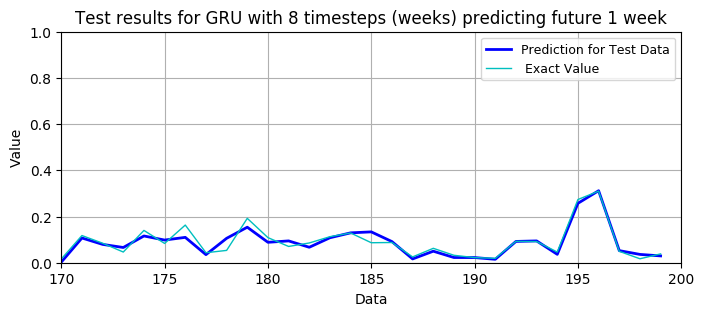

In [15]:
plt.figure(3, figsize=(8, 3), dpi=100)
plt.style.use(['default'])
plt.plot(range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_pred, 'b', linewidth=2, label='Prediction for Test Data')
plt.plot(range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_total[TRAIN_SIZE+VAL_SIZE:TRAIN_SIZE+VAL_SIZE+TEST_SIZE], c='c', linewidth=1, label=' Exact Value')
plt.xlim(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE)
plt.ylim(0, 1)
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Test results for GRU with 8 timesteps (weeks) predicting future 1 week')
plt.grid(True)
plt.legend(loc='best', fontsize=9)
plt.show()